In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('hotel_booking.csv .zip')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [7]:
#Deleted the columns that were not of use
colmn_of_no_use=['name','email','phone-number','credit_card']
df=df.drop(columns=colmn_of_no_use)

In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
df.shape

(119390, 32)

In [10]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [18]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [20]:
#we are fetching the missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [22]:
df.dropna(inplace=True)
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.00000,217.000000,217.000000,217.000000,217.0,...,217.000000,217.000000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000,217
mean,0.078341,40.520737,2015.465438,38.198157,10.824885,1.56682,4.631336,1.410138,0.036866,0.0,...,0.009217,0.147465,1.285714,202.617512,262.105991,0.0,63.793733,0.092166,0.198157,2016-03-10 17:01:56.129032192
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000,0.000000,2015-08-09 00:00:00
25%,0.000000,12.000000,2015.000000,33.000000,6.000000,0.00000,2.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,185.000000,281.000000,0.0,40.000000,0.000000,0.000000,2015-11-15 00:00:00
50%,0.000000,27.000000,2015.000000,45.000000,9.000000,2.00000,4.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,185.000000,281.000000,0.0,48.000000,0.000000,0.000000,2015-11-15 00:00:00
75%,0.000000,36.000000,2016.000000,46.000000,13.000000,2.00000,6.000000,2.000000,0.000000,0.0,...,0.000000,0.000000,2.000000,324.000000,281.000000,0.0,85.000000,0.000000,0.000000,2016-07-10 00:00:00
max,1.000000,364.000000,2017.000000,53.000000,31.000000,9.00000,21.000000,3.000000,2.000000,0.0,...,2.000000,7.000000,6.000000,444.000000,499.000000,0.0,246.000000,1.000000,3.000000,2017-08-27 00:00:00
std,0.269329,61.748375,0.720053,12.890292,7.582065,1.49270,3.552846,0.520406,0.232788,0.0,...,0.135769,0.717768,1.251454,111.487444,103.602708,0.0,38.823568,0.289929,0.546365,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0x168095e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1680974d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x168095310>],
 'medians': [<matplotlib.lines.Line2D at 0x1680a4810>],
 'fliers': [<matplotlib.lines.Line2D at 0x1680a5150>],
 'means': []}

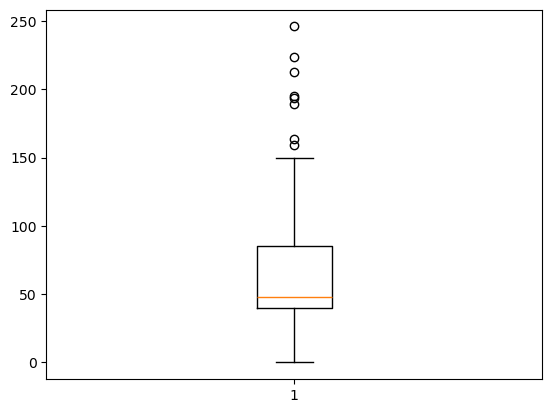

In [24]:
plt.boxplot(df['adr']) #Here we used boxplot to detect the outliers

In [25]:
cancelled=df['is_canceled'].value_counts(normalize=True)
cancelled

is_canceled
0    0.921659
1    0.078341
Name: proportion, dtype: float64

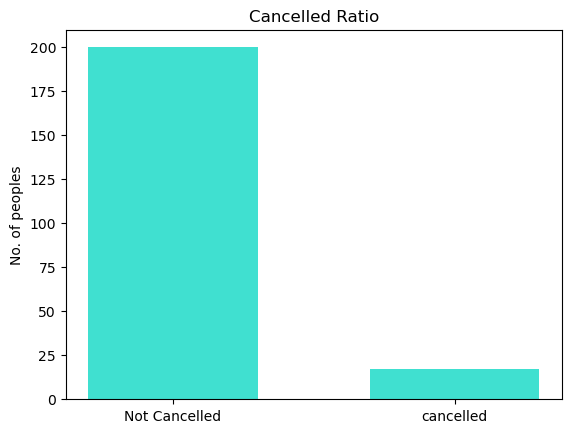

In [28]:
#In this bar chart we are trying to show the no. of Cancelled and non cancelled Ratio
plt.bar(['Not Cancelled','cancelled'],df['is_canceled'].value_counts(),color='Turquoise',width=0.6)
plt.title('Cancelled Ratio')
plt.ylabel('No. of peoples')
plt.savefig('Cancelled_Ratio.jpg')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

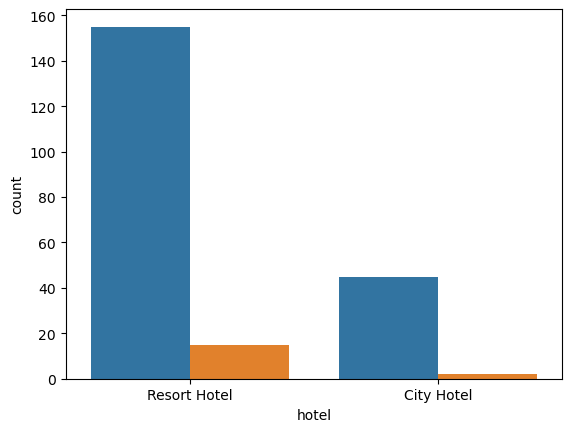

In [29]:
ax=sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.title('Cancellation on the basis of types of hotels')
plt.savefig('Cancellation_on_the_basis_of_hotels.jpg')
#Insight we got is city hotels having more bookings and cancelleation than resort hotel, 
#there could be many reasons like
 
#Proximity to Attractions: City hotels may be near airports, public transport, or popular urban attractions.
#Shorter Booking Window: City hotels often cater to last-minute bookings due to spontaneous travel decisions.
#Higher Accessibility: City hotels are easier to reach and accommodate a wider range of travelers.
#Flexible Cancellation Policies: Urban hotels may offer more flexible cancellation terms to attract bookings, leading to increased cancellations
plt.savefig('Cancellation_on_the_basis_of_hotels.jpg')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

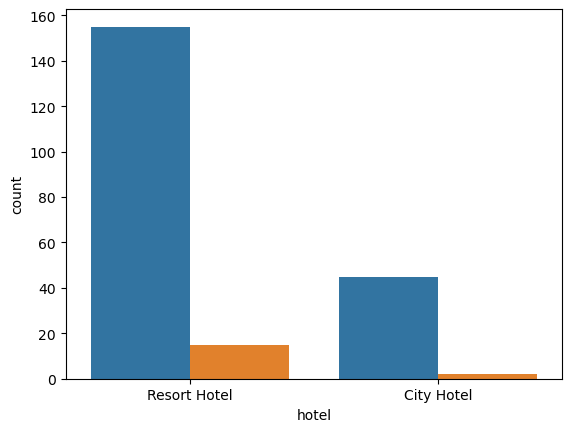

In [55]:
ax = sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Cancellation on the Basis of Types of Hotels')
plt.savefig('Cancellation_on_the_basis_of_hotels.jpg')

In [ ]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)
#here it means resort have 27% cancellation and 72% bookings

In [ ]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)
#this ratio shows hotels have 58% bookings and 42% cancellations

In [ ]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

In [ ]:
plt.figure(figsize=(30,12))
plt.title('Average daily rate in city and resort hotel (ADR)',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.legend(fontsize=20)
plt.show()
plt.savefig('average_daily_rate_in_city.jpg')

In [ ]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue='is_canceled',data=df)
plt.ylabel('Number of reservations')
plt.legend(['Not cancelled','cancelled'])
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.title('ADR per month', fontsize=30)
df_filtered=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index()
sns.barplot(x='month',y='adr',data=df_filtered)
plt.show()

In [33]:
cancelled_data=df[df['is_canceled']==1]
top_10_country=cancelled_data['country'].value_counts()[:10]
top_10_country

country
PRT    16
ITA     1
Name: count, dtype: int64

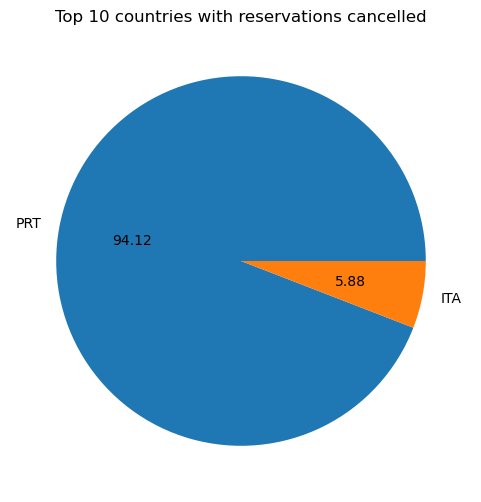

In [38]:
plt.figure(figsize=(6,6))
plt.title('Top 10 countries with reservations cancelled')
plt.pie(top_10_country,autopct='%.2f',labels=top_10_country.index)
plt.show()

In [40]:
df['market_segment'].value_counts()

market_segment
Corporate        131
Online TA         44
Direct            21
Offline TA/TO     18
Complementary      2
Groups             1
Name: count, dtype: int64

In [42]:
df['market_segment'].value_counts(normalize=True)

market_segment
Corporate        0.603687
Online TA        0.202765
Direct           0.096774
Offline TA/TO    0.082949
Complementary    0.009217
Groups           0.004608
Name: proportion, dtype: float64

In [44]:
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Corporate        0.764706
Direct           0.117647
Offline TA/TO    0.058824
Online TA        0.058824
Name: proportion, dtype: float64

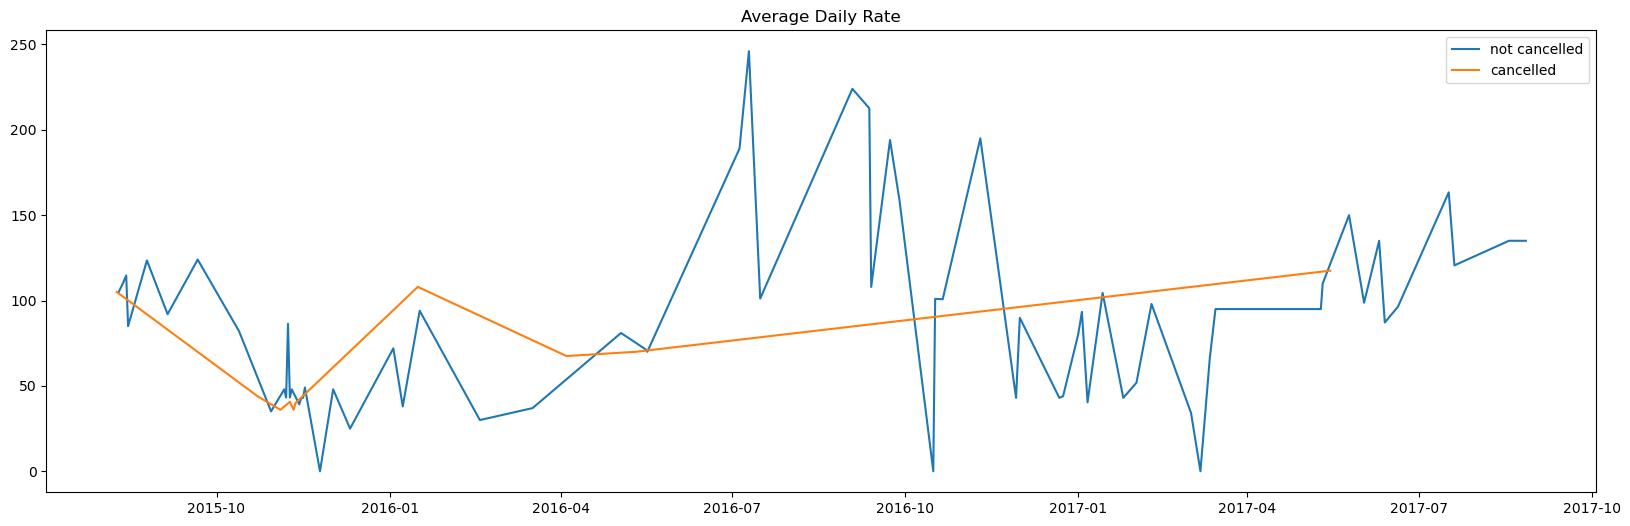

In [46]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True) 
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data = df[df['is_canceled']==0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize =(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label= 'not cancelled') 
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label= 'cancelled')
plt.legend()
     

In [47]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] > '2016') & (cancelled_df_adr['reservation_status_date'] < '2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date'] > '2016') & (not_cancelled_df_adr['reservation_status_date'] < '2017-09')]

     

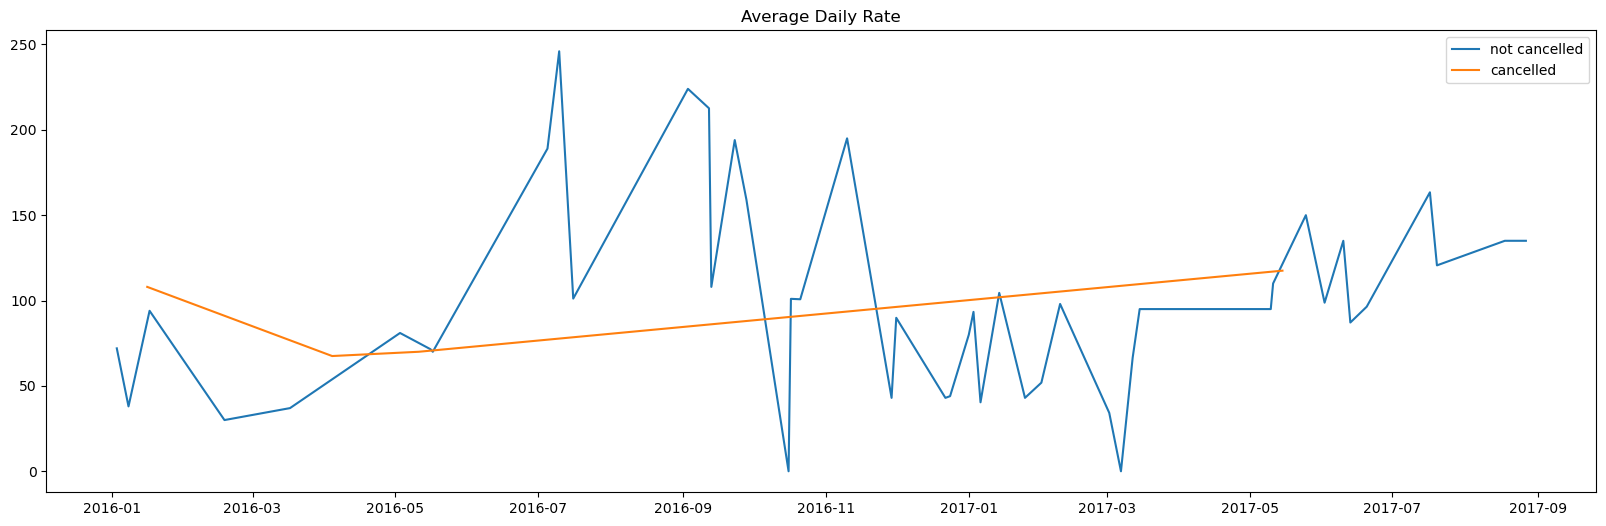

In [50]:
plt.figure(figsize =(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label= 'not cancelled') 
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label= 'cancelled')
plt.legend()
plt.show()
     

AttributeError: 'numpy.int64' object has no attribute 'startswith'

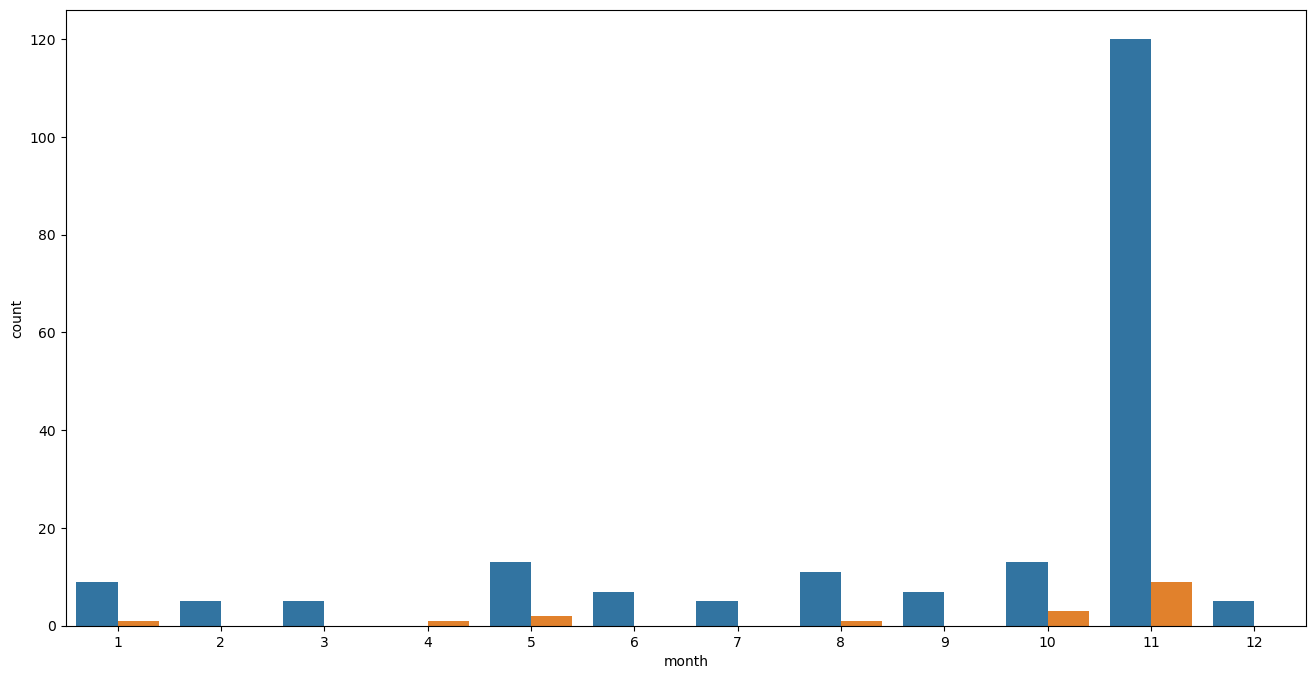

In [51]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue='is_canceled',data=df)
plt.ylabel('Number of reservations')
plt.legend(['Not cancelled ','Cancelled '])
plt.show()